# Label_Stats.ipynb

Compute summary statistics about hand-labeled data

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Input file locations

In [2]:
data_dir = os.path.join("..", "corrected_labels", "human_labels_audited")

# Files with labels in the gold standard 
_CONLL_2_IN_GOLD_FILE =           os.path.join(data_dir, "CoNLL_2_in_gold.csv")
_CONLL_3_IN_GOLD_FILE =           os.path.join(data_dir, "CoNLL_3_in_gold.csv")
_CONLL_3_TRAIN_IN_GOLD_FILE =     os.path.join(data_dir, "CoNLL_3_train_in_gold.csv")
_CONLL_4_IN_GOLD_FILE =           os.path.join(data_dir, "CoNLL_4_in_gold.csv")
_CONLL_4_TRAIN_IN_GOLD_FILE =     os.path.join(data_dir, "CoNLL_4_train_in_gold.csv")

# Files with labels not in the gold standard
_CONLL_2_NOT_IN_GOLD_FILE =       os.path.join(data_dir, "CoNLL_2_not_in_gold.csv")
_CONLL_3_NOT_IN_GOLD_FILE =       os.path.join(data_dir, "CoNLL_3_not_in_gold.csv")
_CONLL_3_TRAIN_NOT_IN_GOLD_FILE = os.path.join(data_dir, "CoNLL_3_train_not_in_gold.csv")
_CONLL_4_NOT_IN_GOLD_FILE       = os.path.join(data_dir, "CoNLL_4_not_in_gold.csv")
_CONLL_4_TRAIN_NOT_IN_GOLD_FILE = os.path.join(data_dir, "CoNLL_4_train_not_in_gold.csv")

# Change this constant to True to regenerate PDF/EPS/PNG files with figures.
save_figures = False
figure_dir = os.path.join(data_dir, "label_stats_images")
if save_figures and not os.path.exists(figure_dir):
    os.mkdir(figure_dir)

## Read labels into dataframes

In [3]:
# Constants that govern reading CSV files
Excel_encoding = "Windows-1252"  # Excel's unchangeable default CSV encoding

# Column types in a file of examples not in the gold standard
_NOT_IN_GOLD_DTYPES = {
    "num_teams": "Int64",
    "num_models": "Int64", 
    "fold"      : "string", 
    "doc_offset" : "Int64",
    "model_span": "string",
    "error_type": "string", 
    "corpus_span": "string",
    "corpus_ent_type": "string",
    "correct_span": "string", 
}
_NOT_IN_GOLD_DROP_COLS = ["time_started", "time_stopped", "time_elapsed"]

_IN_GOLD_DTYPES = {
    "num_teams": "Int64",
    "num_models": "Int64", 
    "fold"      : "string", 
    "doc_offset" : "Int64",
    "corpus_span": "string",
    "error_type": "string", 
    "corpus_ent_type": "string",
    "correct_span": "string", 
}
_IN_GOLD_DROP_COLS = ["time_started", "time_stopped", "time_elapsed"]
utf_8_encoding =  "utf-8"

def read_star_gold_df(file_name, dtypes, drop_cols, encoding):
    result = (
        pd
        .read_csv(file_name, dtype=dtypes, encoding=encoding)
        .drop(columns=drop_cols)
    )
    #homogenize "num_teams" with "num_models" label to allow combination of the two datasets 
    if "num_teams" in result.columns: 
        result = result.rename(columns = {"num_teams" : "num_models"})
    if "verified" in result.columns: 
        result = result.drop(columns = "verified")
    return result[~result["error_type"].isna()].copy() 

def read_not_in_gold_df(file_name, encoding):
    result = read_star_gold_df(file_name, _NOT_IN_GOLD_DTYPES, _NOT_IN_GOLD_DROP_COLS, encoding )
    result["subset"] = "not_in_gold"
    return result

def read_in_gold_df(file_name, encoding):
    result = read_star_gold_df(file_name, _IN_GOLD_DTYPES, _IN_GOLD_DROP_COLS, encoding) # maybe process a little to add "model span" I dont think I use it though so for now I wont
    result["subset"] = "in_gold"
    return result
    


In [4]:
conll_2_not_in_gold_df = read_not_in_gold_df(_CONLL_2_NOT_IN_GOLD_FILE, encoding=utf_8_encoding)

conll_3_not_in_gold_df = pd.concat([read_not_in_gold_df(_CONLL_3_NOT_IN_GOLD_FILE, encoding=Excel_encoding),
                                   read_not_in_gold_df(_CONLL_3_TRAIN_NOT_IN_GOLD_FILE, encoding=Excel_encoding)])

conll_4_not_in_gold_df = pd.concat([read_not_in_gold_df(_CONLL_4_NOT_IN_GOLD_FILE, encoding=Excel_encoding),
                                   read_not_in_gold_df(_CONLL_4_TRAIN_NOT_IN_GOLD_FILE, encoding=Excel_encoding)])

conll_2_in_gold_df = read_in_gold_df(_CONLL_2_IN_GOLD_FILE, encoding=utf_8_encoding)

conll_3_in_gold_df = pd.concat([read_in_gold_df(_CONLL_3_IN_GOLD_FILE, encoding=Excel_encoding),
                                read_in_gold_df(_CONLL_3_TRAIN_IN_GOLD_FILE, encoding=Excel_encoding)])

conll_4_in_gold_df = pd.concat([read_in_gold_df(_CONLL_4_IN_GOLD_FILE, encoding=Excel_encoding),
                                read_in_gold_df(_CONLL_4_TRAIN_IN_GOLD_FILE, encoding=Excel_encoding)])

# tag with sources :
conll_2_not_in_gold_df['conll_2'] = True 
conll_3_not_in_gold_df["conll_3"] = True
conll_4_not_in_gold_df["conll_4"] = True

conll_2_in_gold_df["conll_2"] = True
conll_3_in_gold_df["conll_3"] = True
conll_4_in_gold_df["conll_4"] = True

In [5]:
conll_4_not_in_gold_df

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_4
0,16,dev,0,"[2225, 2235): 'ex-England'",LOC,None,"[2225, 2235): 'ex-England'",MISC,<NA>,NaN,NaN,not_in_gold,True
1,14,dev,2,"[189, 193): 'Test'",ORG,None,"[189, 218): 'Test and County Cricket Board'",ORG,<NA>,NaN,NaN,not_in_gold,True
2,13,dev,2,"[614, 629): 'Duke of Norfolk'",ORG,None,"[614, 634): 'Duke of Norfolk's XI'",<NA>,<NA>,NaN,NaN,not_in_gold,True
3,17,dev,2,"[760, 765): 'Leeds'",LOC,Tag,<NA>,ORG,<NA>,NaN,NaN,not_in_gold,True
4,12,dev,5,"[45, 53): 'UNDER-21'",MISC,None,<NA>,<NA>,<NA>,NaN,NaN,not_in_gold,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,16,train,940,"[52, 57): 'STYLE'",LOC,None,<NA>,<NA>,<NA>,NaN,NaN,not_in_gold,True
591,17,train,944,"[1030, 1042): 'South Africa'",LOC,Sentence,"[1030, 1035): 'South'",LOC,"[1030, 1042): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True
592,17,train,944,"[1030, 1042): 'South Africa'",LOC,Sentence,"[1036, 1042): 'Africa'",LOC,"[1030, 1042): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True
593,17,train,944,"[415, 427): 'South Africa'",LOC,Sentence,"[415, 420): 'South'",LOC,"[415, 427): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True


In [6]:
conll_3_not_in_gold_df[(conll_3_not_in_gold_df["fold"] == "train")
                       & ~(conll_3_not_in_gold_df["num_models"].isna())
                       & (conll_3_not_in_gold_df["error_type"] != "None")]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3
2,17,train,6,"[121, 137): 'Toronto Dominion'",LOC,Tag,<NA>,PER,<NA>,ORG,TD Bank,not_in_gold,True
5,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,<NA>,NaN,Sentence boundary between first and last name,not_in_gold,True
6,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[459, 468): 'Mickelson'",<NA>,<NA>,NaN,Sentence boundary between first and last name,not_in_gold,True
7,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,<NA>,NaN,Sentence boundary between first and last name,not_in_gold,True
8,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[767, 774): 'O'Meara'",<NA>,<NA>,NaN,Sentence boundary between first and last name,not_in_gold,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,14,train,698,"[1994, 2008): 'Crystal Palace'",LOC,Tag,<NA>,ORG,<NA>,NaN,The world's firstï¿½Boy Scout Rallyï¿½was held...,not_in_gold,True
354,14,train,832,"[419, 427): 'EUROLIRA'",MISC,Tag,<NA>,ORG,<NA>,NaN,Futures contract on exchange rate,not_in_gold,True
356,14,train,872,"[221, 228): 'CHICAGO'",LOC,Both,"[221, 239): 'CHICAGO AREA MILLS'",MISC,<NA>,NaN,Generic mention of mills in the area of Chicago,not_in_gold,True
360,14,train,893,"[118, 130): 'Wyche Fowler'",PER,Span,"[124, 130): 'Fowler'",<NA>,<NA>,NaN,NaN,not_in_gold,True


In [7]:
conll_3_in_gold_df[(conll_3_in_gold_df["fold"] == "train")
                       & ~(conll_3_in_gold_df["num_models"].isna())
                       & (conll_3_in_gold_df["error_type"] != "None")]

,num_models,fold,doc_offset,corpus_span,corpus_ent_type,error_type,correct_span,correct_ent_type,notes,subset,conll_3
3,0,train,6,"[121, 137): 'Toronto Dominion'",PER,Tag,<NA>,ORG,TD Bank,in_gold,True
6,5,train,7,"[289, 291): '3M'",ORG,Wrong,<NA>,NaN,3 Months,in_gold,True
11,4,train,11,"[485, 491): 'Rajavi'",MISC,Tag,<NA>,PER,Massoud Rajavi,in_gold,True
17,0,train,25,"[141, 151): 'mid-Norway'",MISC,Tag,<NA>,LOC,"Could also be considered a tokenization error,...",in_gold,True
21,0,train,29,"[454, 458): 'Phil'",PER,Sentence,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True
...,...,...,...,...,...,...,...,...,...,...,...
922,4,train,939,"[19, 24): 'WALES'",LOC,Tag,<NA>,ORG,Soccer team,in_gold,True
928,0,train,944,"[1030, 1035): 'South'",LOC,Sentence,"[1030, 1042): 'South Africa'",LOC,NaN,in_gold,True
929,0,train,944,"[1036, 1042): 'Africa'",LOC,Sentence,"[1030, 1042): 'South Africa'",LOC,NaN,in_gold,True
930,1,train,944,"[415, 420): 'South'",LOC,Sentence,"[415, 427): 'South Africa'",LOC,NaN,in_gold,True


In [8]:
print("CoNLL 2 Not in gold error types", conll_2_not_in_gold_df["error_type"].unique())
print("\nCoNLL 3 Not in gold error types", conll_3_not_in_gold_df["error_type"].unique())
print("\nCoNLL 4 Not in gold error types", conll_4_not_in_gold_df["error_type"].unique())

print("\nCoNLL 2 In gold error types", conll_2_in_gold_df["error_type"].unique())
print("\nCoNLL 3 In gold error types", conll_3_in_gold_df["error_type"].unique())
print("\nCoNLL 4 In gold error types", conll_4_in_gold_df["error_type"].unique())

CoNLL 2 Not in gold error types <StringArray>
['Sentence', 'None', 'Wrong', 'Token', 'Tag', 'Span', 'Both', 'Missing']
Length: 8, dtype: string

CoNLL 3 Not in gold error types <StringArray>
['None', 'Tag', 'Sentence', 'Missing', 'Token', 'Span', 'Wrong', 'Both']
Length: 8, dtype: string

CoNLL 4 Not in gold error types <StringArray>
['None', 'Tag', 'Both', 'Span', 'Sentence', 'Wrong', 'Missing', 'Token']
Length: 8, dtype: string

CoNLL 2 In gold error types <StringArray>
['None', 'Wrong', 'Token', 'Sentence', 'Missing', 'Span', 'Tag']
Length: 7, dtype: string

CoNLL 3 In gold error types <StringArray>
['None', 'Tag', 'Sentence', 'Token', 'Span', 'Wrong', 'Both', 'Missing']
Length: 8, dtype: string

CoNLL 4 In gold error types <StringArray>
['None', 'Tag', 'Sentence', 'Wrong', 'Token', 'Missing', 'Span', 'Both']
Length: 8, dtype: string


## Fill in blank values

Many fields are left blank during manual labeling because they 
can be inferred from the remaining fields.

In [9]:
def infer_corpus_span_not_in_gold(row):
    if not pd.isna(row["corpus_span"]):
        # Don't override values already present
        return row["corpus_span"]
    elif row["error_type"] in ["None", "Sentence", "Token", "Wrong", "Missing", "Ambiguous"]: 
        # Don't attempt inference for these error types.
        return row["corpus_span"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["corpus_span"]
    elif row["error_type"] == "Tag":
        return row["model_span"]
    else:
        raise ValueError(f"Can't infer corpus_span for row \n{row}")
        
def infer_correct_span_not_in_gold(row):
    if not pd.isna(row["correct_span"]):
        # Don't override values already present
        return row["correct_span"]
    elif row["error_type"] in ["None", "Wrong", "Ambiguous"]:
        # Don't attempt inference for these error types.
        return row["correct_span"]
    elif row["error_type"] == "Tag":
        #in this, case the original span was correct, just the tag needs changing
        return row["corpus_span"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_span"]
    elif row["error_type"] in ["Span", "Sentence", "Token", "Both", "Missing"]:
        return row["model_span"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")
    
def infer_correct_ent_type_not_in_gold(row):
    if not pd.isna(row["correct_ent_type"]):
        # Don't override values already present
        return row["correct_ent_type"]
    elif row["error_type"] in ["None", "Sentence", "Token", "Wrong", "Span", "Ambiguous"]:
        # Don't attempt inference for these error types.
        return row["correct_ent_type"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_ent_type"]
    elif row["error_type"] in ["Tag", "Both", "Missing"]:
        return row["model_ent_type"]
    else:
        raise ValueError(f"Can't infer correct_ent_type for row:\n{row}")
    

def infer_blanks_not_in_gold(df):
    ret = df.copy()
    ret["corpus_span"] = [infer_corpus_span_not_in_gold(r) for _, r in ret.iterrows()]
    ret["correct_span"] = [infer_correct_span_not_in_gold(r) for _, r in ret.iterrows()]
    ret["correct_ent_type"] = [infer_correct_ent_type_not_in_gold(r) for _, r in ret.iterrows()]
    return ret

#### now for the in_gold inferences: we can't quite do as much but we can try 
    #i'll have to go back over this when I have actual data to crossreference with 

def infer_correct_span_in_gold(row): 
    if not pd.isna(row["correct_span"]):
        #do nothing if correct span already exists
        return row["correct_span"]
    elif row["error_type"] in  ['Sentence', 'Token', 'Span', 'Wrong', 'Both']:
        # don't attempt to inference for these values 
        return row["correct_span"]
    elif row["error_type"] in [ "Tag", "None" ]:
        return row["corpus_span"] 
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_span"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")


def infer_correct_ent_type_in_gold(row):
    if not pd.isna(row["correct_ent_type"]):
        # Don't override values already present
        return row["correct_ent_type"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results. can't really inference. 
        return row["correct_ent_type"]
    elif row["error_type"] in ['Tag', 'Sentence', 'Token', 'Wrong', 'Both']:
        #dont attempt inference for these model types 
        return row["correct_ent_type"]
    elif row["error_type"] in ["None", "Span"]:
        return row["corpus_ent_type"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")
def infer_blanks_in_gold(df):
    ret = df.copy()
    ret["correct_span"] = [infer_correct_span_in_gold(r) for _, r in ret.iterrows()]
    ret["correct_ent_type"] = [infer_correct_ent_type_in_gold(r) for _, r in ret.iterrows()]
    return ret

conll_2_not_in_gold_full = infer_blanks_not_in_gold(conll_2_not_in_gold_df)
conll_3_not_in_gold_full = infer_blanks_not_in_gold(conll_3_not_in_gold_df)
conll_4_not_in_gold_full = infer_blanks_not_in_gold(conll_4_not_in_gold_df)

conll_2_in_gold_full = infer_blanks_in_gold(conll_2_in_gold_df)
conll_3_in_gold_full = infer_blanks_in_gold(conll_3_in_gold_df)
conll_4_in_gold_full = infer_blanks_in_gold(conll_4_in_gold_df)

In [10]:
#check for data that cannot be used, due to mis-entering
def find_bad_data(df):
    ret = df[df["fold"].isna() | df["doc_offset"].isna()]
    return ret
bad_NG_conll_2 = find_bad_data(conll_2_not_in_gold_full)
bad_NG_conll_3 = find_bad_data(conll_3_not_in_gold_full)
bad_NG_conll_4 = find_bad_data(conll_4_not_in_gold_full)

bad_IG_conll_2 = find_bad_data(conll_2_in_gold_full)
bad_IG_conll_3 = find_bad_data(conll_3_in_gold_full)
bad_IG_conll_4 = find_bad_data(conll_4_in_gold_full)

bad_total = (
    bad_NG_conll_2
    .append(bad_NG_conll_3)
    .append(bad_NG_conll_4)
    .append(bad_IG_conll_2)
    .append(bad_IG_conll_3)
    .append(bad_IG_conll_4)
)
display(bad_total)

# if if bad_total.count() > 0:
#   raise ValueError("Found Data with no fold or document numbers")

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,conll_3,conll_4


## Eliminate duplicates

Use the values we just imputed to identify instances of the same span being
fixed twice.

In [11]:
def combine_eliminate_duplicate_entries(df_in_a, df_in_b, not_in_gold=False, cross_subset=False, remove_duped_outputs = True):
    # Combines two datasets, labels and removes duplicates
    # not_in_gold - should be true if both data sets are from the not_in_gold subset, false otherwise 
    # cross_subset - should be true if the data sets are from two different subsets (i.e. one is in gold and the other is not in gold)
        # this is used for the correct label of duplicates. 
    # side effect: rearranges order of data 
    df_in = df_in_a.append(df_in_b, ignore_index= True)
    #sort so that when duplicates are removed, the entry with the most "hits" is preferred
    df_in = df_in.sort_values(by=["num_models_missing"], na_position='last')
    
    #label duplicates
    df_temp = df_in.fillna({"num_models" : np.nan, "corpus_span": "NA","corpus_ent_type":" NA", 
                            "correct_span": "NA"})
    df_duplicated = df_temp.duplicated(["fold", "doc_offset", "corpus_span",
                                        "corpus_ent_type","correct_span"], keep = 'last')    
    if cross_subset:
        df_in.loc[df_duplicated, 'subset'] = "both"
    else:
        df_in.loc[df_duplicated, 'dataset'] = "both"

    df = df_in

    #now, use df_temp to select elements to throw out, normally 
    to_remove  = df_temp.duplicated(["fold", "doc_offset", "error_type", "corpus_span",
                                     "corpus_ent_type", "correct_span"], keep = 'first')
    df_temp = df_temp[~to_remove]
    df_double_counted = df_temp.duplicated(["fold", "doc_offset", "correct_ent_type","correct_span"]) & \
        df_temp['error_type'].isin(['Sentence', 'Token', 'Span', 'Both', 'Missing'])

    ret = (df[(~to_remove)]).copy()
    if remove_duped_outputs: 
        ret = (ret[~df_double_counted]).copy()

    #reorder to improve ease of reading 
    ret.sort_values(by=["fold", "doc_offset","correct_span"], ignore_index = True, inplace=True)

    #if ~cross_subset: 
    if not cross_subset:
        ret.loc[ret['dataset'] == 'both'] = fix_subset_entries(ret.loc[ret['dataset'] == 'both'])
    ret.fillna({'conll_2': False, 'conll_3': False, 'conll_4': False}, inplace=True)
    return ret

def in_df(row, df):
    feilds = ['fold', 'doc_offset', 'correct_span', 'correct_ent_type', 'error_type', 'corpus_span', 'corpus_ent_type' ]
    df_temp = df
    for feild in feilds: 
        df_temp = df_temp[(df_temp[feild].isna() & row.isna()[feild]) | (df_temp[feild] == row[feild])]
        if df_temp.count().max() == 0: return False 
    return True
  
def fix_subset_entries(df_in): 
    df = df_in.copy()
    for i, row in df.iterrows(): 
        df.at[i, "conll_3"] = in_df(row,all_labels_conll_3_not_in_gold) | in_df(row,all_labels_conll_3_in_gold)
        df.at[i, "conll_2"] = in_df(row,all_labels_conll_2_not_in_gold) | in_df(row,all_labels_conll_2_in_gold)
        df.at[i, "conll_4"] = in_df(row,all_labels_conll_4_not_in_gold) 
    return df
    
def clean_data(df_in):
    #removes data that is currently not able to be used (location not avaliable etc.)
    df = df_in.copy()
    ret = df[~df["error_type"].isna()]
    ret = ret[~ret["fold"].isna()]  
    ret = ret[~ret["doc_offset"].isna()]
    return df

#clean data 
all_labels_conll_2_not_in_gold = clean_data(conll_2_not_in_gold_full)
all_labels_conll_3_not_in_gold = clean_data(conll_3_not_in_gold_full)
all_labels_conll_4_not_in_gold = clean_data(conll_4_not_in_gold_full)

all_labels_conll_2_in_gold = clean_data(conll_2_in_gold_full)
all_labels_conll_3_in_gold = clean_data(conll_3_in_gold_full)
all_labels_conll_4_in_gold = clean_data(conll_4_in_gold_full)

#move data to "number of models missing". This alows for more "apples to apples" comparisons
all_labels_conll_2_not_in_gold["num_models_missing"] = (all_labels_conll_2_not_in_gold.num_models - 16) * -1  # number of models used
all_labels_conll_3_not_in_gold["num_models_missing"] = (all_labels_conll_3_not_in_gold.num_models - 17) * -1  # number of models used 
all_labels_conll_4_not_in_gold["num_models_missing"] = (all_labels_conll_4_not_in_gold.num_models - 17) * -1  # number of models used 
all_labels_conll_2_in_gold ["num_models_missing"] = all_labels_conll_2_in_gold.num_models
all_labels_conll_3_in_gold ["num_models_missing"] = all_labels_conll_3_in_gold.num_models
all_labels_conll_4_in_gold ["num_models_missing"] = all_labels_conll_4_in_gold.num_models

all_labels_conll_2_not_in_gold["agreeing_models"] = all_labels_conll_2_not_in_gold.num_models
all_labels_conll_3_not_in_gold["agreeing_models"] = all_labels_conll_3_not_in_gold.num_models
all_labels_conll_4_not_in_gold["agreeing_models"] = all_labels_conll_4_not_in_gold.num_models
all_labels_conll_2_in_gold ["agreeing_models"] = 16 - all_labels_conll_2_in_gold.num_models
all_labels_conll_3_in_gold ["agreeing_models"] = 17 - all_labels_conll_3_in_gold.num_models
all_labels_conll_4_in_gold ["agreeing_models"] = 17 - all_labels_conll_4_in_gold.num_models

#combine dataframes, and remove duplicates 
#Note: due to the scemantics involved duplicate entries will defer to the first of two sets entered 

# merge like subsets first 
all_labels_not_in_gold = combine_eliminate_duplicate_entries(all_labels_conll_2_not_in_gold, all_labels_conll_3_not_in_gold, not_in_gold=True)
all_labels_not_in_gold = combine_eliminate_duplicate_entries(all_labels_not_in_gold, all_labels_conll_4_not_in_gold, not_in_gold=True)

all_labels_in_gold = combine_eliminate_duplicate_entries(all_labels_conll_2_in_gold, all_labels_conll_3_in_gold)
all_labels_in_gold = combine_eliminate_duplicate_entries(all_labels_in_gold, all_labels_conll_4_in_gold)

# then merge between subsets
all_labels = combine_eliminate_duplicate_entries(all_labels_not_in_gold, all_labels_in_gold, cross_subset=True)
#display all_labels
all_labels.head(14)

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4
0,5,dev,0,<NA>,NaN,None,"[1879, 1889): 'Australian'",MISC,"[1879, 1889): 'Australian'",MISC,NaN,in_gold,False,5,12,False,NaN,True
1,0,dev,0,<NA>,NaN,None,"[20, 34): 'LEICESTERSHIRE'",ORG,"[20, 34): 'LEICESTERSHIRE'",ORG,NaN,in_gold,False,0,17,True,both,False
2,0,dev,0,<NA>,NaN,None,"[2225, 2235): 'ex-England'",MISC,"[2225, 2235): 'ex-England'",MISC,NaN,in_gold,False,0,17,True,both,False
3,17,dev,0,"[2225, 2235): 'ex-England'",LOC,None,<NA>,MISC,<NA>,NaN,NaN,not_in_gold,False,0,17,True,NaN,False
4,16,dev,0,"[2225, 2235): 'ex-England'",LOC,None,"[2225, 2235): 'ex-England'",MISC,<NA>,NaN,NaN,not_in_gold,False,1,16,False,NaN,True
5,<NA>,dev,2,<NA>,NaN,Tag,"[122, 129): 'England'",LOC,"[122, 129): 'England'",ORG,Cricket team,both,False,<NA>,<NA>,True,NaN,False
6,<NA>,dev,2,<NA>,NaN,Tag,"[1354, 1362): 'Scotland'",LOC,"[1354, 1362): 'Scotland'",ORG,NaN,not_in_gold,False,<NA>,<NA>,True,NaN,False
7,0,dev,2,<NA>,NaN,None,"[189, 218): 'Test and County Cricket Board'",ORG,"[189, 218): 'Test and County Cricket Board'",ORG,NaN,in_gold,False,0,17,True,both,False
8,<NA>,dev,2,<NA>,NaN,Tag,"[235, 244): 'Australia'",LOC,"[235, 244): 'Australia'",ORG,Cricket team,not_in_gold,False,<NA>,<NA>,True,NaN,False
9,0,dev,2,<NA>,NaN,None,"[25, 30): 'ASHES'",MISC,"[25, 30): 'ASHES'",MISC,NaN,in_gold,True,0,17,True,both,False


In [12]:
# Combine in gold and not, since that logic seems to be working atm
all_labels_conll_2 = combine_eliminate_duplicate_entries(all_labels_conll_2_not_in_gold, all_labels_conll_2_in_gold, cross_subset=True)
all_labels_conll_3 = combine_eliminate_duplicate_entries(all_labels_conll_3_not_in_gold, all_labels_conll_3_in_gold, cross_subset=True)
all_labels_conll_4 = combine_eliminate_duplicate_entries(all_labels_conll_4_not_in_gold, all_labels_conll_4_in_gold, cross_subset=True)

In [13]:
all_labels_conll_4 = combine_eliminate_duplicate_entries(all_labels_conll_4_not_in_gold, all_labels_conll_4_in_gold, cross_subset=True)
df = all_labels_conll_4
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_4,num_models_missing,agreeing_models
1630,0,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,0,17
1631,0,train,29,<NA>,NaN,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,both,True,0,17
1632,0,train,29,<NA>,NaN,Sentence,"[762, 766): 'Mark'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,both,True,0,17
1633,0,train,29,<NA>,NaN,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,both,True,0,17
1634,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,both,True,1,16


In [14]:
df = all_labels_conll_3
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3,num_models_missing,agreeing_models
1447,1,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,1,16
1448,0,train,29,<NA>,NaN,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17
1449,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
1450,0,train,29,<NA>,NaN,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17
1451,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
1452,1,train,29,<NA>,NaN,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,True,1,16
1453,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",<NA>,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16


In [15]:
# We only care about errors for now
all_errors_conll_2 = all_labels_conll_2[all_labels_conll_2["error_type"] != "None"].copy()
all_errors_conll_3 = all_labels_conll_3[all_labels_conll_3["error_type"] != "None"].copy()
all_errors_conll_4 = all_labels_conll_4[all_labels_conll_4["error_type"] != "None"].copy()

In [16]:
# Add the "hand_labelled" column
all_errors_conll_2["hand_labelled"] = all_errors_conll_2["num_models"].isna()
all_errors_conll_3["hand_labelled"] = all_errors_conll_3["num_models"].isna()
all_errors_conll_4["hand_labelled"] = all_errors_conll_4["num_models"].isna()

model_errors_conll_2 = all_errors_conll_2[~all_errors_conll_2["hand_labelled"]]
model_errors_conll_3 = all_errors_conll_3[~all_errors_conll_3["hand_labelled"]]
model_errors_conll_4 = all_errors_conll_4[~all_errors_conll_4["hand_labelled"]]

hand_errors_conll_2 = all_errors_conll_2[all_errors_conll_2["hand_labelled"]]
hand_errors_conll_3 = all_errors_conll_3[all_errors_conll_3["hand_labelled"]]
hand_errors_conll_4 = all_errors_conll_4[all_errors_conll_4["hand_labelled"]]

In [17]:
# Merge the hand-labeled errors
common_fields = ["fold", "doc_offset", "error_type", "corpus_span", "corpus_ent_type", "correct_span", "correct_ent_type"]
hand_errors = pd.concat([
    hand_errors_conll_2[common_fields],
    hand_errors_conll_3[common_fields], 
    hand_errors_conll_4[common_fields]
]).drop_duplicates()
hand_errors

,fold,doc_offset,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type
20,dev,15,Token,"[41, 51): 'CUNNINGHAM'",PER,"[33, 51): 'RANDALL CUNNINGHAM'",PER
38,dev,30,Missing,<NA>,<NA>,"[18, 21): 'NBP'",ORG
62,dev,42,Missing,<NA>,<NA>,"[476, 500): 'Driefontein Consolidated'",ORG
63,dev,42,Missing,<NA>,<NA>,"[505, 516): 'Gold Fields'",ORG
165,dev,102,Tag,"[172, 178): 'Israel'",LOC,"[172, 178): 'Israel'",ORG
...,...,...,...,...,...,...,...
2791,train,817,Wrong,"[517, 533): 'WESTERN DIVISION'",MISC,<NA>,NaN
2792,train,817,Wrong,"[765, 781): 'EASTERN DIVISION'",MISC,<NA>,NaN
2833,train,872,Tag,"[382, 389): 'DECATUR'",ORG,"[382, 389): 'DECATUR'",LOC
2834,train,872,Both,"[395, 419): 'CLINTON AND CEDAR RAPIDS'",ORG,"[395, 402): 'CLINTON'",LOC


In [18]:
# Simplified logic for computing just error counts
common_fields = ["fold", "doc_offset", "error_type", "corpus_span", "corpus_ent_type", "correct_span", "correct_ent_type"]
model_errors_3_and_4 = (
    pd.merge(model_errors_conll_3[common_fields + ["conll_3"]], 
             model_errors_conll_4[common_fields + ["conll_4"]],
             how="outer")
)
model_errors = pd.merge(model_errors_conll_2[common_fields + ["conll_2"]], 
                      model_errors_3_and_4[common_fields + ["conll_3", "conll_4"]],
                      how="outer")

model_errors["conll_2"] = model_errors["conll_2"].fillna(False)
model_errors["conll_3"] = model_errors["conll_3"].fillna(False)
model_errors["conll_4"] = model_errors["conll_4"].fillna(False)
model_errors["doc_offset"] = model_errors["doc_offset"].astype(int)
model_errors

,fold,doc_offset,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,conll_2,conll_3,conll_4
0,dev,15,Wrong,"[15, 40): 'AMERICAN FOOTBALL-RANDALL'",MISC,<NA>,NaN,True,False,True
1,dev,20,Sentence,"[90, 96): 'Berlin'",MISC,"[90, 107): 'Berlin Grand Prix'",MISC,True,False,False
2,dev,38,Missing,<NA>,<NA>,"[1011, 1016): 'MATIF'",ORG,True,True,True
3,dev,39,Token,"[11, 23): 'Boxing-Bruno'",MISC,"[18, 23): 'Bruno'",PER,True,True,True
4,dev,42,Span,"[476, 539): 'Driefontein Consolidated and Gold...",ORG,"[519, 539): 'Kloof Gold Mining Co'",ORG,True,True,True
...,...,...,...,...,...,...,...,...,...,...
917,train,872,Tag,"[382, 389): 'DECATUR'",MISC,"[382, 389): 'DECATUR'",LOC,False,False,True
918,train,872,Tag,"[395, 419): 'CLINTON AND CEDAR RAPIDS'",ORG,"[395, 419): 'CLINTON AND CEDAR RAPIDS'",LOC,False,False,True
919,train,904,Tag,"[507, 514): 'Ajaccio'",ORG,"[507, 514): 'Ajaccio'",LOC,False,False,True
920,train,937,Sentence,"[1626, 1648): 'Goldman, Sachs and Co.'",ORG,"[1626, 1652): 'Goldman, Sachs and Co. Inc'",ORG,False,False,True


In [19]:
# Look for overlap.
hand_and_model_errors = pd.merge(model_errors, hand_errors, on=common_fields)[common_fields]
hand_and_model_errors

,fold,doc_offset,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type
0,dev,20,Sentence,"[90, 96): 'Berlin'",MISC,"[90, 107): 'Berlin Grand Prix'",MISC
1,test,61,Missing,<NA>,<NA>,"[79, 92): 'Mediterranean'",MISC
2,test,71,Missing,<NA>,<NA>,"[89, 107): 'WESTERN HEMISPHERE'",LOC
3,test,123,Token,"[11, 17): 'Iowa-S'",LOC,"[11, 15): 'Iowa'",LOC
4,test,161,Span,"[11, 24): 'John Lewis UK'",ORG,"[11, 21): 'John Lewis'",ORG
...,...,...,...,...,...,...,...
75,train,438,Wrong,"[506, 522): 'WESTERN DIVISION'",MISC,<NA>,NaN
76,train,530,Tag,"[1255, 1268): 'SAN FRANCISCO'",LOC,"[1255, 1268): 'SAN FRANCISCO'",ORG
77,train,530,Wrong,"[368, 384): 'CENTRAL DIVISION'",MISC,<NA>,NaN
78,train,530,Wrong,"[960, 976): 'CENTRAL DIVISION'",MISC,<NA>,NaN


In [20]:
model_errors[["fold", "conll_2", "conll_3", "conll_4", "error_type"]].groupby(["fold", "conll_2", "conll_3", "conll_4"]).count()

error_type
fold  conll_2 conll_3 conll_4            
dev   False   False   True             42
              True    False            49
                      True             57
      True    False   False            15
                      True              3
              True    False             6
                      True             24
test  False   False   True             54
              True    False            76
                      True             78
      True    False   False            52
                      True             14
              True    False            17
                      True             75
train False   False   True             99
              True    False            52
                      True            209

In [21]:
# Dev + test
(
    model_errors[model_errors["fold"].isin(["dev", "test"])]
    [["conll_2", "conll_3", "conll_4", "error_type"]]
    .groupby(["conll_2", "conll_3", "conll_4"]).count()
)

error_type
conll_2 conll_3 conll_4            
False   False   True             96
        True    False           125
                True            135
True    False   False            67
                True             17
        True    False            23
                True             99

In [22]:
model_errors_test = model_errors[model_errors["fold"] == "test"]
hand_errors_test = hand_errors[hand_errors["fold"] == "test"]
overlap_errors_test = hand_and_model_errors[hand_and_model_errors["fold"] == "test"]

print(f"""
Total errors: {len(model_errors.index) + len(hand_errors.index) - len(hand_and_model_errors.index)}
Model errors: {len(model_errors.index)}
By-Hand errors: {len(hand_errors.index) - len(hand_and_model_errors.index)}
Test fold errors: {len(model_errors_test.index) + len(hand_errors_test.index) - len(overlap_errors_test.index)}
""")


Total errors: 1475
Model errors: 922
By-Hand errors: 553
Test fold errors: 498



In [23]:
df = all_labels_conll_4_in_gold
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,corpus_span,corpus_ent_type,error_type,correct_span,correct_ent_type,notes,subset,conll_4,num_models_missing,agreeing_models
26,0,train,29,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,0,17
27,0,train,29,"[454, 458): 'Phil'",PER,Sentence,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17
28,0,train,29,"[459, 468): 'Mickelson'",PER,Sentence,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17
29,0,train,29,"[762, 766): 'Mark'",PER,Sentence,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17
30,0,train,29,"[767, 774): 'O'Meara'",PER,Sentence,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17
31,1,train,29,"[886, 893): 'Shigeki'",PER,Sentence,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,True,1,16
32,0,train,29,"[894, 902): 'Maruyama'",PER,Sentence,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,True,0,17


In [24]:
df = all_labels_conll_4_not_in_gold
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_4,num_models_missing,agreeing_models
11,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",PER,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
12,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
13,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",PER,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
14,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
15,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16
16,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16


In [25]:
df = all_labels_conll_3_not_in_gold
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3,num_models_missing,agreeing_models
5,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
6,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[459, 468): 'Mickelson'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
7,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
8,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[767, 774): 'O'Meara'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
9,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",<NA>,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16
10,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[894, 902): 'Maruyama'",<NA>,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16


In [26]:
all_labels_conll_3 = combine_eliminate_duplicate_entries(all_labels_conll_3_not_in_gold, all_labels_conll_3_in_gold, cross_subset=True)


In [27]:
all_labels_conll_3_or_4 = combine_eliminate_duplicate_entries(all_labels_conll_3, all_labels_conll_4)
df = all_labels_conll_3_or_4
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3,num_models_missing,agreeing_models,conll_4,dataset
2069,0,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,0,17,False,both
2070,0,train,29,<NA>,NaN,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17,False,both
2071,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17,False,NaN
2072,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17,False,NaN
2073,0,train,29,<NA>,NaN,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17,False,NaN
2074,0,train,29,<NA>,NaN,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,both,False,0,17,True,NaN
2075,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",<NA>,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16,False,NaN


In [28]:
all_labels.loc[:,"hand_labelled"] = all_labels["num_models"].isna()
all_labels.loc[all_labels["hand_labelled"], 'conll_2'] = False
all_labels.loc[all_labels["hand_labelled"], 'conll_3'] = False
all_labels.loc[all_labels["hand_labelled"], 'conll_4'] = False

In [29]:
all_labels.head(1)

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
0,5,dev,0,<NA>,NaN,None,"[1879, 1889): 'Australian'",MISC,"[1879, 1889): 'Australian'",MISC,NaN,in_gold,False,5,12,False,NaN,True,False


In [30]:
all_labels[(all_labels["fold"] == "train") & (all_labels["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
2626,0,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,False,0,17,True,both,False,False
2627,0,train,29,<NA>,NaN,Sentence,"[454, 458): 'Phil'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,False,0,17,True,both,False,False
2628,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[459, 468): 'Mickelson'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,False,0,17,True,NaN,False,False
2629,0,train,29,<NA>,NaN,Sentence,"[762, 766): 'Mark'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,False,0,17,True,both,False,False
2630,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[767, 774): 'O'Meara'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,False,0,17,True,NaN,False,False
2631,0,train,29,<NA>,NaN,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,False,0,17,True,both,False,False
2632,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,False,1,16,False,NaN,True,False


In [31]:
labels_from_models = all_labels[~all_labels['hand_labelled']]
print(
f"""
Total number of labels flagged: {len(all_labels.index)}
Total number of labels flagged by models: {len(labels_from_models.index)}
Total number of labels flagged by humans: {all_labels['hand_labelled'].sum()}
Total number of labels flagged in by models in test fold: {(labels_from_models['fold'] == 'test').sum()}
Total number of labels flagged in by models in dev fold: {(labels_from_models['fold'] == 'dev').sum()}
Total number of labels flagged in by models in train fold: {(labels_from_models['fold'] == 'train').sum()}
"""
    )


Total number of labels flagged: 4124
Total number of labels flagged by models: 3587
Total number of labels flagged by humans: 537
Total number of labels flagged in by models in test fold: 1350
Total number of labels flagged in by models in dev fold: 934
Total number of labels flagged in by models in train fold: 1303



In [32]:
error_labels = all_labels[all_labels["error_type"] != "None"].copy()
print(
f"""
Actual error counts:
Hand-labeled total: {error_labels["hand_labelled"].sum()}
CoNLL_2 total: {error_labels["conll_2"].sum()}
CoNLL_3 total: {error_labels["conll_3"].sum()}
CoNLL_4 total: {error_labels["conll_4"].sum()}
CoNLL_3 train: {(error_labels["conll_3"] & (error_labels["fold"] == "train")).sum()}
CoNLL_4 train: {(error_labels["conll_4"] & (error_labels["fold"] == "train")).sum()}
CoNLL_3 and CoNLL_4 train: {(error_labels["conll_3"] & error_labels["conll_4"]
                            & (error_labels["fold"] == "train")).sum()}
CoNLL_3 and not CoNLL_4 train: {(error_labels["conll_3"] & ~error_labels["conll_4"]
                                & (error_labels["fold"] == "train")).sum()}
"""
    )


Actual error counts:
Hand-labeled total: 533
CoNLL_2 total: 210
CoNLL_3 total: 604
CoNLL_4 total: 469
CoNLL_3 train: 270
CoNLL_4 train: 227
CoNLL_3 and CoNLL_4 train: 126
CoNLL_3 and not CoNLL_4 train: 144



In [33]:
error_labels[error_labels["conll_3"] & error_labels["hand_labelled"]]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled


In [34]:
# "Manual" labels -- those found by hand in the vicinity of labels that were
# suggested by our scripts -- should't overlap with any of the automatic ones.
manual_labels = all_labels[all_labels["num_models"].isna()]

#currently, dataframe.duplicated doesn't work well when NA values exist, so we remove them temporarily
manual_labels_filled = manual_labels.fillna({"corpus_span": "NA",
                                             "corpus_ent_type": "NA", 
                                             "correct_span": "NA"})

manual_labels_filled.head()

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
5,<NA>,dev,2,<NA>,NaN,Tag,"[122, 129): 'England'",LOC,"[122, 129): 'England'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True
6,<NA>,dev,2,<NA>,NaN,Tag,"[1354, 1362): 'Scotland'",LOC,"[1354, 1362): 'Scotland'",ORG,NaN,not_in_gold,False,<NA>,<NA>,False,NaN,False,True
8,<NA>,dev,2,<NA>,NaN,Tag,"[235, 244): 'Australia'",LOC,"[235, 244): 'Australia'",ORG,Cricket team,not_in_gold,False,<NA>,<NA>,False,NaN,False,True
10,<NA>,dev,2,<NA>,NaN,Tag,"[525, 533): 'Scotland'",LOC,"[525, 533): 'Scotland'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True
11,<NA>,dev,2,<NA>,NaN,Tag,"[61, 70): 'Australia'",LOC,"[61, 70): 'Australia'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True


In [35]:
# First check that they don't overlap with each other.
duplicate_manual_labels = manual_labels_filled.duplicated(["fold", "doc_offset", 
                                                           "error_type", "corpus_span",
                                                           "corpus_ent_type", "correct_span"])

if duplicate_manual_labels.sum() > 0:
    manual_labels_filled[duplicate_manual_labels]
    raise ValueError("Found {duplicate_manual_labels.sum()} duplicate manual labels")
else:
    print("No duplicate manual labels found, good!")

No duplicate manual labels found, good!


In [36]:
# Now we can check for overlap between manual and automatic labels
auto_labels = all_labels[~all_labels["num_models"].isna()]

#currently, dataframe.duplicated doesn't work well when NA values exist, so we remove them temporarily
auto_labels_filled = auto_labels.fillna({"corpus_span": "NA",
                                         "corpus_ent_type": "NA", 
                                         "correct_span": "NA"})

merge_cols = ["fold", "doc_offset", "error_type", "corpus_span"]
shared_labels = (
    pd.merge(auto_labels_filled, manual_labels_filled, on=merge_cols, suffixes=["_auto", "_manual"])
    .sort_values(["fold", "doc_offset", "error_type"])
)

# This dataframe in its current form can have some false positives. Check manually.
pd.options.display.max_columns = None
shared_labels 

,num_models_auto,fold,doc_offset,model_span_auto,model_ent_type_auto,error_type,corpus_span,corpus_ent_type_auto,correct_span_auto,correct_ent_type_auto,notes_auto,subset_auto,conll_2_auto,num_models_missing_auto,agreeing_models_auto,conll_3_auto,dataset_auto,conll_4_auto,hand_labelled_auto,num_models_manual,model_span_manual,model_ent_type_manual,corpus_ent_type_manual,correct_span_manual,correct_ent_type_manual,notes_manual,subset_manual,conll_2_manual,num_models_missing_manual,agreeing_models_manual,conll_3_manual,dataset_manual,conll_4_manual,hand_labelled_manual
0,15,dev,33,"[11, 16): 'NYMEX'",LOC,Missing,NA,NA,"[11, 16): 'NYMEX'",ORG,NYMEX heating oil near session lows in pre-close.,not_in_gold,False,2,15,True,both,False,False,<NA>,<NA>,NaN,NA,"[81, 86): 'NYMEX'",MISC,"New York Mercantile Exchange, used as an adjec...",not_in_gold,False,<NA>,<NA>,False,NaN,False,True
1,16,dev,33,"[1186, 1191): 'NYMEX'",ORG,Missing,NA,NA,"[1186, 1191): 'NYMEX'",ORG,New York Mercantile Exchange,not_in_gold,False,1,16,True,both,True,False,<NA>,<NA>,NaN,NA,"[81, 86): 'NYMEX'",MISC,"New York Mercantile Exchange, used as an adjec...",not_in_gold,False,<NA>,<NA>,False,NaN,False,True
2,0,dev,112,<NA>,NaN,Wrong,"[3804, 3807): 'ERA'",MISC,NA,NaN,NaN,both,True,0,17,True,both,True,False,<NA>,<NA>,NaN,NA,NA,NaN,"Abbreviation for ""earned run average"", which i...",not_in_gold,False,<NA>,<NA>,False,NaN,False,True
3,7,test,23,"[853, 869): 'PACIFIC DIVISION'",MISC,None,"[853, 860): 'PACIFIC'",LOC,NA,NaN,Divisions of leagues not considered entities,not_in_gold,True,9,7,False,NaN,False,False,<NA>,<NA>,NaN,LOC,"[853, 860): 'PACIFIC'",NaN,"ambiguous, might be MISC because adjective [85...",in_gold,False,<NA>,<NA>,False,NaN,False,True
4,2,test,56,<NA>,NaN,Token,"[11, 16): 'UK-US'",MISC,"[11, 13): 'UK'",LOC,NaN,in_gold,False,2,15,True,NaN,False,False,<NA>,<NA>,NaN,MISC,"[14, 16): 'US'",LOC,NaN,in_gold,False,<NA>,<NA>,False,NaN,False,True
5,17,test,61,"[1550, 1553): 'Med'",MISC,Missing,NA,NA,"[1550, 1553): 'Med'",MISC,"Short for ""Mediterranean""",not_in_gold,False,0,17,True,both,True,False,<NA>,<NA>,NaN,NA,"[11, 14): 'Med'",MISC,"Abbreviation for ""Mediterranean""",not_in_gold,False,<NA>,<NA>,False,both,False,True
6,13,test,61,"[79, 92): 'Mediterranean'",MISC,Missing,NA,NA,"[79, 92): 'Mediterranean'",MISC,NaN,not_in_gold,True,3,13,True,both,False,False,<NA>,<NA>,NaN,NA,"[11, 14): 'Med'",MISC,"Abbreviation for ""Mediterranean""",not_in_gold,False,<NA>,<NA>,False,both,False,True
7,8,test,61,"[898, 901): 'Med'",LOC,Missing,NA,NA,"[898, 901): 'Med'",MISC,"Abbreviation for ""Mediterranean""",not_in_gold,True,8,8,False,NaN,False,False,<NA>,<NA>,NaN,NA,"[11, 14): 'Med'",MISC,"Abbreviation for ""Mediterranean""",not_in_gold,False,<NA>,<NA>,False,both,False,True
8,17,test,68,"[157, 176): 'Canadian West Coast'",LOC,Missing,NA,NA,"[166, 176): 'West Coast'",LOC,"Corpus *does* flag ""Canadian"" as MISC",not_in_gold,True,0,17,True,both,False,False,<NA>,<NA>,NaN,NA,"[20, 30): ' West Coast'",LOC,abstract ``places'' (e.g. {\it the free world}),not_in_gold,False,<NA>,<NA>,False,NaN,False,True
9,17,test,68,"[224, 234): 'West Coast'",LOC,Missing,NA,NA,"[224, 234): 'West Coast'",LOC,NaN,not_in_gold,True,0,17,True,both,True,False,<NA>,<NA>,NaN,NA,"[20, 30): ' West Coast'",LOC,abstract ``places'' (e.g. {\it the free world}),not_in_gold,False,<NA>,<NA>,False,NaN,False,True


## Count up how many of each type of error we found

In [37]:

def make_counts(labels_df):
    ans = (
        labels_df[["num_models_missing", "fold", "error_type"]]
        .groupby(["num_models_missing", "fold", "error_type"])
        .aggregate({"num_models_missing": "count"})
        .rename(columns={"num_models_missing": "total"})
        .reset_index()
    )
    return ans

counts_df = make_counts(all_labels)
counts_df_conll_3 = make_counts(all_labels[all_labels["conll_3"]])
counts_df_conll_2 = make_counts(all_labels[all_labels["conll_2"] ])
counts_df_conll_4 = make_counts(all_labels[all_labels["conll_4"] ])
#legacy name for now 
counts_df_both_datasets = make_counts(all_labels[all_labels["conll_2"] & all_labels["conll_3"] ])

#look at In gold (IG) vs Not In Gold (NG)datasets
counts_df_IG = make_counts(all_labels_in_gold)
counts_df_NG = make_counts(all_labels_not_in_gold)
counts_df_both_subsets = make_counts(all_labels[(all_labels["subset"] == "both")])

#maybe try in gold vs Not gold differentiation for conll2 vs 3? 
counts_df_conll_3_NG = make_counts(all_labels_conll_3_not_in_gold)
counts_df_conll_2_NG = make_counts(all_labels_conll_2_not_in_gold)
counts_df_both_NG =    make_counts(all_labels_not_in_gold[all_labels_not_in_gold["dataset"] == "both"])

counts_df_conll_3_IG = make_counts(all_labels_conll_3_in_gold)
counts_df_conll_2_IG = make_counts(all_labels_conll_2_in_gold)
counts_df_both_IG =    make_counts(all_labels_in_gold[all_labels_in_gold["dataset"] == "both"])

counts_df_conll_3_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_3"])])
counts_df_conll_2_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_2"])])
counts_df_conll_both_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_2"] & all_labels["conll_3"])])




#also run this on a file-by-file basis for later analysis 
counts_df_conll_both_both

,num_models_missing,fold,error_type,total
0,0,dev,Sentence,1
1,0,dev,Span,3
2,0,dev,Tag,8
3,0,dev,Token,2
4,0,dev,Wrong,3
5,0,test,Both,3
6,0,test,None,2
7,0,test,Sentence,2
8,0,test,Span,8
9,0,test,Tag,52


In [38]:
# counts_df doesn't include errors that were found by inspection but weren't
# flagged by any model. Count those separately.
non_model_errors = all_labels[all_labels["num_models"].isna()]
non_model_errors.head()

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
5,<NA>,dev,2,<NA>,NaN,Tag,"[122, 129): 'England'",LOC,"[122, 129): 'England'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True
6,<NA>,dev,2,<NA>,NaN,Tag,"[1354, 1362): 'Scotland'",LOC,"[1354, 1362): 'Scotland'",ORG,NaN,not_in_gold,False,<NA>,<NA>,False,NaN,False,True
8,<NA>,dev,2,<NA>,NaN,Tag,"[235, 244): 'Australia'",LOC,"[235, 244): 'Australia'",ORG,Cricket team,not_in_gold,False,<NA>,<NA>,False,NaN,False,True
10,<NA>,dev,2,<NA>,NaN,Tag,"[525, 533): 'Scotland'",LOC,"[525, 533): 'Scotland'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True
11,<NA>,dev,2,<NA>,NaN,Tag,"[61, 70): 'Australia'",LOC,"[61, 70): 'Australia'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True


In [39]:
def count_model_errs(counts, fold):
    ans = counts[(counts["error_type"] != "None") & (counts["fold"] == fold)]["total"].sum()
    return ans 

def error_report(fold_name, pretty_fold_name):
    model_errors = count_model_errs(counts_df, fold_name)
    model_errors_conll_2 = count_model_errs(counts_df_conll_2, fold_name)
    model_errors_conll_3 = count_model_errs(counts_df_conll_3, fold_name)
    model_errors_conll_4 = count_model_errs(counts_df_conll_4, fold_name)
    model_errors_both = count_model_errs(counts_df_both_subsets, fold_name)

    fold_non_model_errors = len(non_model_errors[non_model_errors["fold"] == fold_name].index)
    total_errors = model_errors + fold_non_model_errors

    print(f"{pretty_fold_name} set: \n Found {total_errors} errors in total "
          f"({model_errors} from models and {fold_non_model_errors} "
          f"from inspecting documents)")
    print(f" CoNLL 2 model found {model_errors_conll_2} errors\n"
          f" CoNLL 3 model found {model_errors_conll_3} errors\n"
          f" CoNLL 4 model found {model_errors_conll_4} errors\n"
         )
    print(f" {model_errors_both} errors were found by both models" )

error_report("train", "Train")
error_report("dev", "Development")
error_report("test", "Test")

Train set: 
 Found 610 errors in total (371 from models and 239 from inspecting documents)
 CoNLL 2 model found 0 errors
 CoNLL 3 model found 270 errors
 CoNLL 4 model found 227 errors

 204 errors were found by both models
Development set: 
 Found 345 errors in total (174 from models and 171 from inspecting documents)
 CoNLL 2 model found 47 errors
 CoNLL 3 model found 117 errors
 CoNLL 4 model found 95 errors

 90 errors were found by both models
Test set: 
 Found 442 errors in total (315 from models and 127 from inspecting documents)
 CoNLL 2 model found 163 errors
 CoNLL 3 model found 217 errors
 CoNLL 4 model found 147 errors

 148 errors were found by both models


In [40]:
#compare incedence on In gold vs Not in Gold over all folds 
total_model_errors =     counts_df[(counts_df["error_type"] != "None")]["total"].sum()
IG_total_model_errors =  counts_df_IG[counts_df_IG["error_type"] != "None"]["total"].sum()
NG_total_model_errors =  counts_df_NG[counts_df_NG["error_type"] != "None"]["total"].sum()
both_total_model_errors =counts_df_both_subsets[counts_df_both_subsets["error_type"] != "None"]["total"].sum()
print(f"Total errors found:\n Models found {total_model_errors} errors. ({len(non_model_errors.index)} additional errors found by inspecting documents)")
print(f" {IG_total_model_errors}  errors were found from the In Gold subset \n {NG_total_model_errors} errors were found from the Not In Gold subset")
print(f" {both_total_model_errors}  errors were found from both subsets")

print("\n\nBeakdown by fold: ")

def error_breakdown_report(fold_name, pretty_fold_name):
    model_errors = count_model_errs(counts_df, fold_name)
    IG_dev_errors = count_model_errs(counts_df_IG, fold_name)
    NG_dev_errors = count_model_errs(counts_df_NG, fold_name)
    both_dev_errors = count_model_errs(counts_df_both_subsets, fold_name)
    overlap_percent_total = (both_dev_errors/model_errors)*100.0 
    print(f"{pretty_fold_name} Set:\n Models found {model_errors} errors")
    print(f" {IG_dev_errors} errors were found from the In Gold subset\n"
          f" {NG_dev_errors} errors were found from the Not In Gold subset\n"
          f" {both_dev_errors}  errors were found from both subsets    ({overlap_percent_total:2.1f}% of errors were found in both subsets)")

error_breakdown_report("train", "Train")
error_breakdown_report("dev", "Development")
error_breakdown_report("test", "Test")

Total errors found:
 Models found 860 errors. (537 additional errors found by inspecting documents)
 686  errors were found from the In Gold subset 
 531 errors were found from the Not In Gold subset
 442  errors were found from both subsets


Beakdown by fold: 
Train Set:
 Models found 371 errors
 304 errors were found from the In Gold subset
 234 errors were found from the Not In Gold subset
 204  errors were found from both subsets    (55.0% of errors were found in both subsets)
Development Set:
 Models found 174 errors
 136 errors were found from the In Gold subset
 106 errors were found from the Not In Gold subset
 90  errors were found from both subsets    (51.7% of errors were found in both subsets)
Test Set:
 Models found 315 errors
 246 errors were found from the In Gold subset
 191 errors were found from the Not In Gold subset
 148  errors were found from both subsets    (47.0% of errors were found in both subsets)


In [41]:
def find_error_counts_by_num_teams(counts, combine_folds= False):
    groupby_set = ["num_models_missing"] if combine_folds else ["num_models_missing", "fold"]
    errors_by_model_hits = (
        counts[counts["error_type"] != "None"]
        .groupby(groupby_set)
        .aggregate({"total": "sum"})
        .rename(columns={"total": "errors"})
        .reset_index()
    )
    if combine_folds: 
        
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            .groupby(groupby_set).aggregate({"total":"sum"})
            .rename(columns={"total": "not_errors"}).reset_index()
        )
    else:
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            [["num_models_missing", "fold", "total"]]
            .rename(columns={"total": "not_errors"})
        )
    error_counts_by_num_teams = pd.merge(errors_by_model_hits, not_errors_by_model_hits)
    error_counts_by_num_teams["fraction_errors"] = (
        error_counts_by_num_teams["errors"] / (error_counts_by_num_teams["errors"] + error_counts_by_num_teams["not_errors"])
    )
    return error_counts_by_num_teams

#total
error_counts_by_num_teams_total = find_error_counts_by_num_teams(counts_df)
error_counts_by_num_teams_total_combined = find_error_counts_by_num_teams(counts_df, combine_folds = True)

#seperate by dataset
error_counts_by_num_teams_conll_2 = find_error_counts_by_num_teams(counts_df_conll_2)
error_counts_by_num_teams_conll_2_combined = find_error_counts_by_num_teams(counts_df_conll_2, combine_folds = True)

error_counts_by_num_teams_conll_3 = find_error_counts_by_num_teams(counts_df_conll_3)
error_counts_by_num_teams_conll_3_combined = find_error_counts_by_num_teams(counts_df_conll_3, combine_folds = True)

#the in gold data has much lower "hit"rate, so also create a copy that excludes in_gold

error_counts_by_num_teams_conll_2_NG = find_error_counts_by_num_teams(counts_df_conll_2_NG)
error_counts_by_num_teams_conll_2_NG_combined = find_error_counts_by_num_teams(counts_df_conll_2_NG, combine_folds= True)

error_counts_by_num_teams_conll_3_NG = find_error_counts_by_num_teams(counts_df_conll_3_NG)
error_counts_by_num_teams_conll_3_NG_combined = find_error_counts_by_num_teams(counts_df_conll_3_NG, combine_folds= True)


#seperate by subset 
error_counts_by_num_teams_IG = find_error_counts_by_num_teams(counts_df_IG)
error_counts_by_num_teams_IG_combined = find_error_counts_by_num_teams(counts_df_IG, combine_folds = True)

error_counts_by_num_teams_NG = find_error_counts_by_num_teams(counts_df_NG)
error_counts_by_num_teams_NG_combined = find_error_counts_by_num_teams(counts_df_NG, combine_folds = True)

#display one example 
error_counts_by_num_teams_IG_combined

,num_models_missing,errors,not_errors,fraction_errors
0,0,433,724,0.374244
1,1,74,297,0.199461
2,2,57,253,0.183871
3,3,48,161,0.229665
4,4,41,157,0.207071
5,5,33,155,0.175532


In [42]:
def find_error_counts_by_num_teams(counts, combine_folds= False):
    groupby_set = ["num_models_missing"] if combine_folds else ["num_models_missing", "fold"]
    errors_by_model_hits = (
        counts[counts["error_type"] != "None"]
        .groupby(groupby_set)
        .aggregate({"total": "sum"})
        .rename(columns={"total": "errors"})
        .reset_index()
    )
    if combine_folds: 
        
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            .groupby(groupby_set).aggregate({"total":"sum"})
            .rename(columns={"total": "not_errors"}).reset_index()
        )
    else:
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            [["num_models_missing", "fold", "total"]]
            .rename(columns={"total": "not_errors"})
        )
    error_counts_by_num_teams = pd.merge(errors_by_model_hits, not_errors_by_model_hits)
    error_counts_by_num_teams["fraction_errors"] = (
        error_counts_by_num_teams["errors"] / (error_counts_by_num_teams["errors"] + error_counts_by_num_teams["not_errors"])
    )
    return error_counts_by_num_teams

#total
error_counts_by_num_teams_total = find_error_counts_by_num_teams(counts_df)
error_counts_by_num_teams_total_combined = find_error_counts_by_num_teams(counts_df, combine_folds = True)

#seperate by dataset
error_counts_by_num_teams_conll_2 = find_error_counts_by_num_teams(counts_df_conll_2)
error_counts_by_num_teams_conll_2_combined = find_error_counts_by_num_teams(counts_df_conll_2, combine_folds = True)

error_counts_by_num_teams_conll_3 = find_error_counts_by_num_teams(counts_df_conll_3)
error_counts_by_num_teams_conll_3_combined = find_error_counts_by_num_teams(counts_df_conll_3, combine_folds = True)

#the in gold data has much lower "hit"rate, so also create a copy that excludes in_gold

error_counts_by_num_teams_conll_2_NG = find_error_counts_by_num_teams(counts_df_conll_2_NG)
error_counts_by_num_teams_conll_2_NG_combined = find_error_counts_by_num_teams(counts_df_conll_2_NG, combine_folds= True)

error_counts_by_num_teams_conll_3_NG = find_error_counts_by_num_teams(counts_df_conll_3_NG)
error_counts_by_num_teams_conll_3_NG_combined = find_error_counts_by_num_teams(counts_df_conll_3_NG, combine_folds= True)


#seperate by subset 
error_counts_by_num_teams_IG = find_error_counts_by_num_teams(counts_df_IG)
error_counts_by_num_teams_IG_combined = find_error_counts_by_num_teams(counts_df_IG, combine_folds = True)

error_counts_by_num_teams_NG = find_error_counts_by_num_teams(counts_df_NG)
error_counts_by_num_teams_NG_combined = find_error_counts_by_num_teams(counts_df_NG, combine_folds = True)

#display one example 
error_counts_by_num_teams_conll_2_combined

,num_models_missing,errors,not_errors,fraction_errors
0,0,140,257,0.352645
1,1,30,104,0.223881
2,2,11,116,0.086614
3,3,4,25,0.137931
4,4,4,39,0.093023
5,5,2,37,0.051282
6,6,3,36,0.076923
7,7,3,48,0.058824
8,8,7,47,0.129630
9,9,6,61,0.089552


In [43]:
# Function to save figures generated here
def savefig( filename): 
    plt.savefig(os.path.join(figure_dir, filename + ".png"), bbox_inches="tight")
    plt.savefig(os.path.join(figure_dir, filename + ".pdf"), bbox_inches="tight")
    plt.savefig(os.path.join(figure_dir, filename + ".eps"), bbox_inches="tight")


Counts for dev set:
{'Fold': 'Dev Fold', 'Original models': 47, 'Custom models': 117, 'Custom models with cross validation': 95, 'Original models and custom models': 35, 'Custom models and cross validated custom models': 56, 'Original models and cross validated models': 23, 'All models': 22, 'Only custom models': 48, 'Only original models': 11, 'Only cross validated models': 38, 'Only original and custom': 13, 'Only original and cross validated': 1, 'Only custom and cross validated': 34}

Counts for test set:
{'Fold': 'Test Fold', 'Original models': 163, 'Custom models': 217, 'Custom models with cross validation': 147, 'Original models and custom models': 117, 'Custom models and cross validated custom models': 97, 'Original models and cross validated models': 78, 'All models': 72, 'Only custom models': 75, 'Only original models': 40, 'Only cross validated models': 44, 'Only original and custom': 45, 'Only original and cross validated': 6, 'Only custom and cross validated': 25}

Counts

<Figure size 432x288 with 0 Axes>

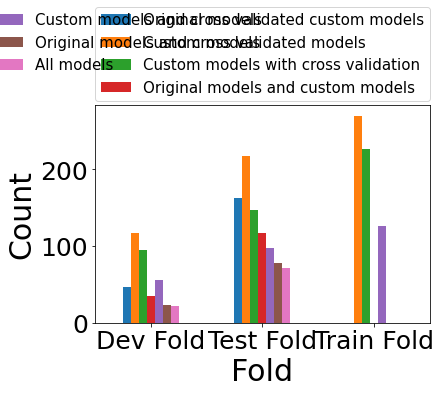

In [44]:
#break down into chart from total errors

def gen_by_dset_counts(df, name):
    counts_by_source = {}
    counts_by_source["Fold"] = name
    counts_by_source ["Original models"] = df[df["conll_2"]].shape[0]
    counts_by_source["Custom models"] = df[df["conll_3"]].shape[0]
    counts_by_source["Custom models with cross validation"] = df[df["conll_4"]].shape[0]
    counts_by_source["Original models and custom models"] = df[df["conll_2"] & df["conll_3"]].shape[0]
    counts_by_source["Custom models and cross validated custom models"] = df[df["conll_3"] & df["conll_4"]].shape[0]
    counts_by_source["Original models and cross validated models"] = df[df["conll_2"] & df["conll_4"]].shape[0]
    counts_by_source["All models"] = df[df["conll_2"]& df["conll_3"] & df["conll_4"]].shape[0]
    return counts_by_source

full_model_counts = gen_by_dset_counts(all_labels[all_labels["error_type"] != "None"], name="total")
dev_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='dev')], name="Dev Fold")
test_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='test')], name="Test Fold")
train_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='train')], name="Train Fold")
count_list = [dev_counts, test_counts, train_counts]
df_counts = pd.DataFrame(count_list)
df_counts

plt.figure('a')
ax = df_counts.plot("Fold", ["Original models", "Custom models", "Custom models with cross validation", "Original models and custom models", "Custom models and cross validated custom models","Original models and cross validated models", "All models"], kind="bar")
                 #title = "Errors found by each model, by Fold"
ax.tick_params(axis='both', labelsize=25, labelrotation=0)
ax.set_ylabel('Count', fontsize=30)
ax.set_xlabel('Fold', fontsize=30)
ax.legend(fontsize=15, loc='lower left', ncol=2, borderaxespad=0, mode='expand',
          bbox_to_anchor=(0., 1.02, 1., .102))
if save_figures:
    savefig("Err_distribution_by_document")

# Combine the dev and test sets to generate stats for the figure in the paper
dev_plus_test_counts = {
    k: dev_counts[k] + test_counts[k] for k in dev_counts.keys()
}

# Compute the sections of the Venn diagram
for d in [dev_counts, test_counts, dev_plus_test_counts, train_counts]:
    d["Only custom models"] = (
         d["Custom models"]
         - d["Original models and custom models"] 
         - d["Custom models and cross validated custom models"]
         + d["All models"])
    d["Only original models"] = (
         d["Original models"]
         - d["Original models and custom models"] 
         - d["Original models and cross validated models"]
         + d["All models"])
    d["Only cross validated models"] = (
         d["Custom models with cross validation"]
         - d["Custom models and cross validated custom models"] 
         - d["Original models and cross validated models"]
         + d["All models"])
    d["Only original and custom"] = (
        d["Original models and custom models"]
        - d["All models"]
    )
    d["Only original and cross validated"] = (
        d["Original models and cross validated models"]
        - d["All models"]
    )
    d["Only custom and cross validated"] = (
        d["Custom models and cross validated custom models"]
        - d["All models"]
    )
    
    
print(f"""
Counts for dev set:
{dev_counts}

Counts for test set:
{test_counts}

Counts for dev set + test set:
{dev_plus_test_counts}

Counts for train set:
{train_counts}
"""
)

### Display frequencies for the not_in_gold subset
Currently we don't have enough data from the in gold data sets to be able to generate a meaningful comparison, so we'll stick with the not_In_gold subset for now 

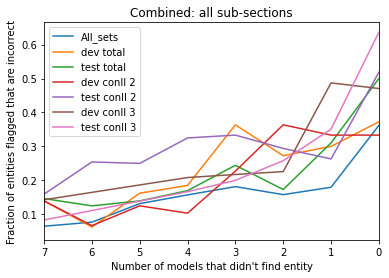

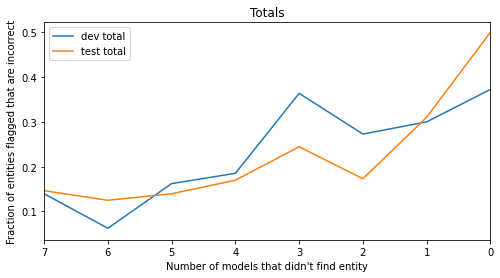

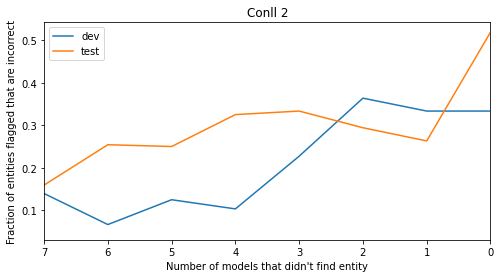

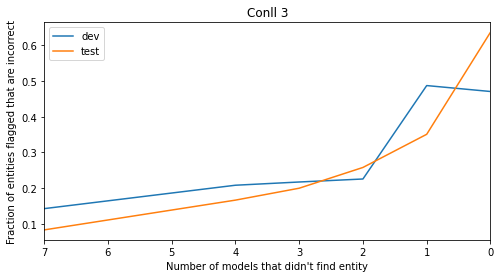

In [45]:
df_total = error_counts_by_num_teams_NG
dev_df_total = df_total[df_total["fold"] == "dev"]
test_df_total = df_total[df_total["fold"] == "test"]

df_conll_2 = error_counts_by_num_teams_conll_2_NG
dev_df_conll_2 = df_conll_2[df_conll_2["fold"] == "dev"]
test_df_conll_2 = df_conll_2[df_conll_2["fold"] == "test"]

df_conll_3 = error_counts_by_num_teams_conll_3_NG
dev_df_conll_3 = df_conll_3[df_conll_3["fold"] == "dev"]
test_df_conll_3 = df_conll_3[df_conll_3["fold"] == "test"]

plt.plot(error_counts_by_num_teams_total_combined ["num_models_missing"], error_counts_by_num_teams_total_combined["fraction_errors"], label="All_sets")

plt.plot(dev_df_total ["num_models_missing"], dev_df_total["fraction_errors"], label="dev total")
plt.plot(test_df_total ["num_models_missing"], test_df_total["fraction_errors"], label="test total")

plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="dev conll 2")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="test conll 2")

plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="dev conll 3")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="test conll 3")


plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Combined: all sub-sections")
plt.legend()
plt.rcParams["figure.figsize"] = [14,7]
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Totals")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total["fraction_errors"], label="dev total")
plt.plot(test_df_total ["num_models_missing"], test_df_total["fraction_errors"], label="test total")
plt.legend()
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Conll 2")
plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="dev")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="test")
plt.legend()
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Conll 3")
plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="dev")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="test")
plt.legend()
plt.show()

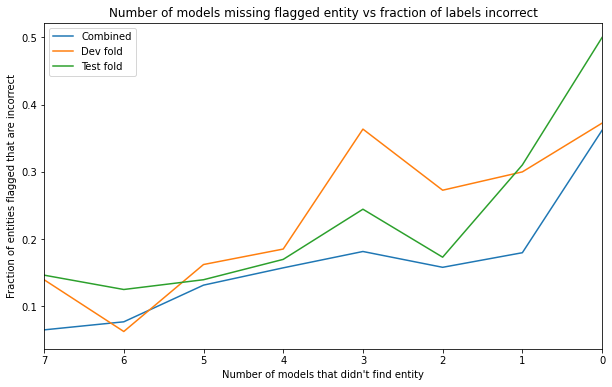

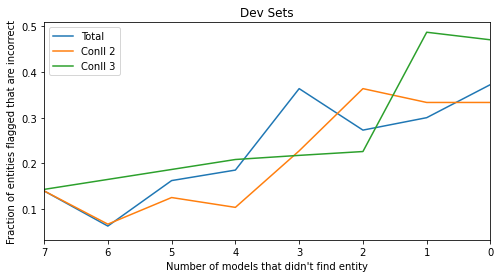

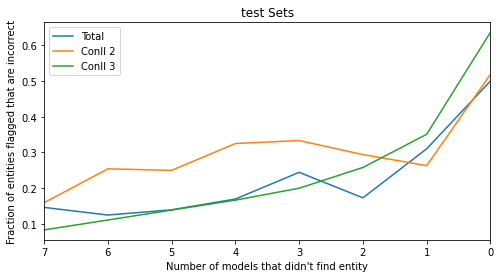

In [46]:
# now look at dev only  and test only

plt.figure(figsize = [10, 6])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Number of models missing flagged entity vs fraction of labels incorrect")
plt.plot(error_counts_by_num_teams_total_combined ["num_models_missing"], error_counts_by_num_teams_total_combined["fraction_errors"], label="Combined")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total ["fraction_errors"], label="Dev fold")
plt.plot(test_df_total ["num_models_missing"], test_df_total ["fraction_errors"], label="Test fold")
plt.legend()
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Dev Sets")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total ["fraction_errors"], label="Total")
plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="Conll 2")
plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="Conll 3")
plt.legend()
plt.show()


plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("test Sets")
plt.plot(test_df_total ["num_models_missing"], test_df_total ["fraction_errors"], label="Total")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="Conll 2")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="Conll 3")
plt.legend()
plt.show()

## Look at data by error type

In [47]:
#break data into sections based on their tags. Later we will do some similar analysis to above, so maintain other data
# use a dictionary to store the info based on different tags. For now we will analyze each tag seperately 
Error_types = ['Sentence', 'Wrong', 'Token', 'Tag', 'Span', 'Both', 'Missing']
ignore_types = [ 'None']
labels_by_error_type = {}

#all_labels_above_seven = all_labels[all_labels["num_models_missing"] <= 7]

for error_type in Error_types:
    labels_by_error_type[error_type] = all_labels[all_labels["error_type"] == error_type].copy()

# now seperate out into counts for some preliminary analysis

row_list = []
for e_type in Error_types: 
        df = labels_by_error_type[e_type] #make a reference to the dataframe
        
        temp_dict = {}
        temp_dict["error_type"] = e_type
        temp_dict["total"] = df.shape[0]
        temp_dict["dev"] = df[df["fold"] == "dev"].shape[0]
        temp_dict["test"] = df[df["fold"] == "test"].shape[0]
        temp_dict["train"] = df[df["fold"] == "train"].shape[0]
        temp_dict["count_conll_2"] = df[df["conll_2"]].shape[0]
        temp_dict["count_conll_3"] = df[df["conll_3"]].shape[0]
        temp_dict["count_conll_4"] = df[df["conll_4"]].shape[0]
        temp_dict["count_hand"] = df[df["num_models"].isna()].shape[0]
        temp_dict["count_not_in_gold"] = df[(df["subset"] != "in_gold")].shape[0]
        temp_dict["count_in_gold"] = df[(df["subset"] != "not_in_gold")].shape[0]

        row_list.append(temp_dict)
count_errs_by_type = pd.DataFrame(row_list)
print("Total number of errors by type")
display(count_errs_by_type[~count_errs_by_type["error_type"].isin(ignore_types)])
# change to percent incedence 
for i in count_errs_by_type.columns:
    if i !="error_type": 
        count_errs_by_type[i] = count_errs_by_type[i].div(count_errs_by_type[i].sum())*100
count_errs_by_type = count_errs_by_type[~count_errs_by_type["error_type"].isin(ignore_types)]
print("\nError type incedence by percent of total errors correctly flagged ")
count_errs_by_type

Total number of errors by type


,error_type,total,dev,test,train,count_conll_2,count_conll_3,count_conll_4,count_hand,count_not_in_gold,count_in_gold
0,Sentence,196,24,36,136,9,113,124,3,156,137
1,Wrong,147,35,30,82,19,48,37,74,97,97
2,Token,58,11,28,19,14,33,21,13,29,50
3,Tag,763,225,251,287,100,277,186,405,451,584
4,Span,89,19,29,41,19,54,29,10,56,71
5,Both,35,3,18,14,8,22,12,4,24,29
6,Missing,105,28,46,31,41,57,60,24,96,17



Error type incedence by percent of total errors correctly flagged 


,error_type,total,dev,test,train,count_conll_2,count_conll_3,count_conll_4,count_hand,count_not_in_gold,count_in_gold
0,Sentence,14.070352,6.956522,8.219178,22.295082,4.285714,18.708609,26.439232,0.562852,17.161716,13.908629
1,Wrong,10.552764,10.144928,6.849315,13.442623,9.047619,7.947020,7.889126,13.883677,10.671067,9.847716
2,Token,4.163676,3.188406,6.392694,3.114754,6.666667,5.463576,4.477612,2.439024,3.190319,5.076142
3,Tag,54.773869,65.217391,57.305936,47.049180,47.619048,45.860927,39.658849,75.984991,49.614961,59.289340
4,Span,6.389088,5.507246,6.621005,6.721311,9.047619,8.940397,6.183369,1.876173,6.160616,7.208122
5,Both,2.512563,0.869565,4.109589,2.295082,3.809524,3.642384,2.558635,0.750469,2.640264,2.944162
6,Missing,7.537688,8.115942,10.502283,5.081967,19.523810,9.437086,12.793177,4.502814,10.561056,1.725888


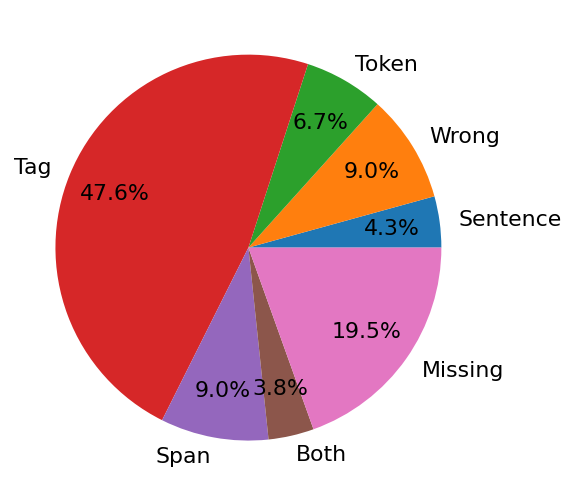

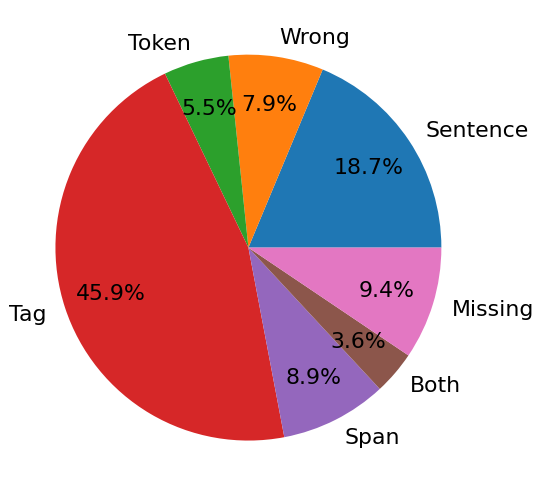

In [48]:
plt.figure()
plt.pie(x=count_errs_by_type["count_conll_2"].array, labels=count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance=.75, labeldistance=1.1, textprops={'fontsize': 22})
plt.tight_layout()
if save_figures:
    savefig("err_distribution_conll_2")
plt.show()

plt.figure()
plt.pie(x=count_errs_by_type["count_conll_3"].array, labels=count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance=.75, labeldistance=1.1, textprops={'fontsize': 22})
plt.tight_layout()
if save_figures:
    savefig("err_distribution_conll_3")
plt.show()

<Figure size 1008x504 with 0 Axes>

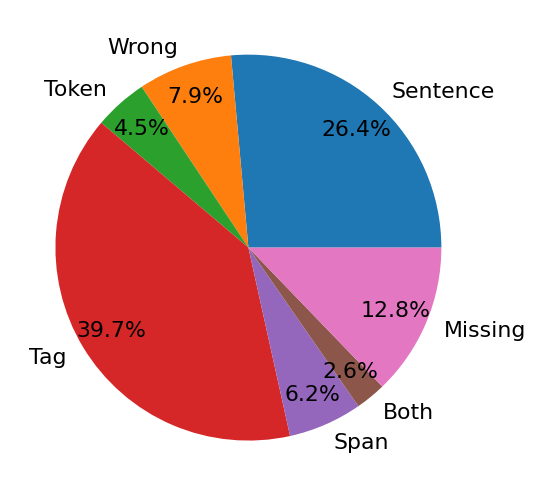

<Figure size 1008x504 with 0 Axes>

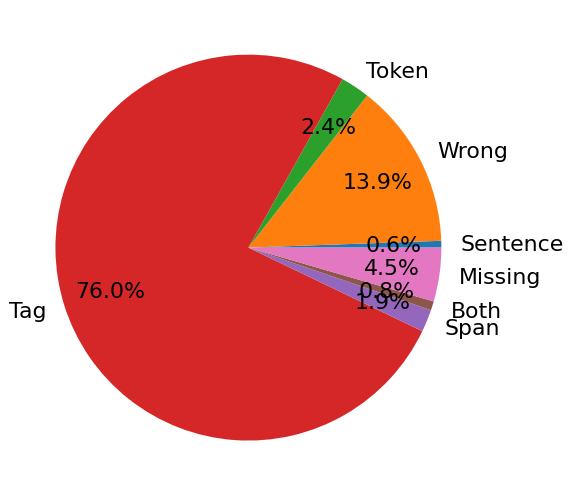

In [49]:
plt.clf()
plt.figure()
plt.pie(x=count_errs_by_type["count_conll_4"].array, labels=count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance=.83, labeldistance=1.1,textprops={'fontsize': 22})
plt.tight_layout()
if save_figures:
    savefig("err_distribution_conll_4")
plt.show()

plt.clf()
plt.figure()
plt.pie(x=count_errs_by_type["count_hand"].array, labels=count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance=.75, labeldistance=1.1,textprops={'fontsize': 22})
plt.tight_layout()
if save_figures:
    savefig("err_distribution_hand")
plt.show()

<AxesSubplot:title={'center':'comparison of error type distribution across subsets'}, xlabel='error_type'>

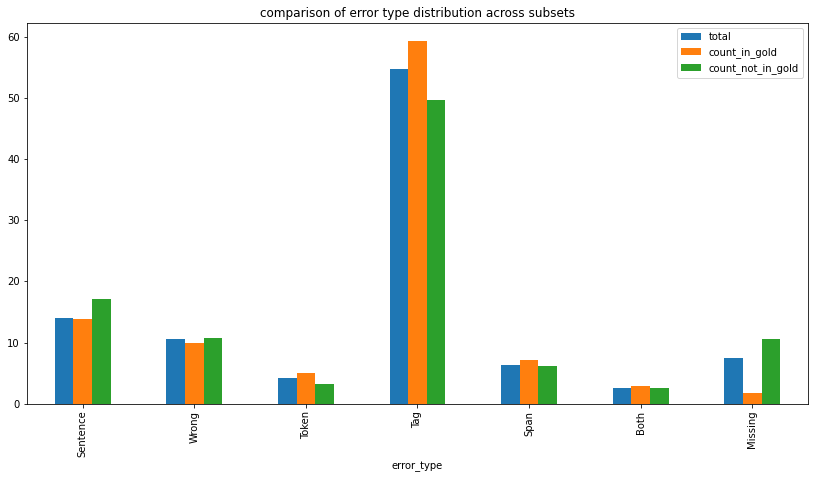

In [50]:
count_errs_by_type.plot("error_type",["total", "count_in_gold","count_not_in_gold"], kind="bar", title="comparison of error type distribution across subsets")

<AxesSubplot:title={'center':'Distribution of errors by error type and by fold'}, xlabel='error_type'>

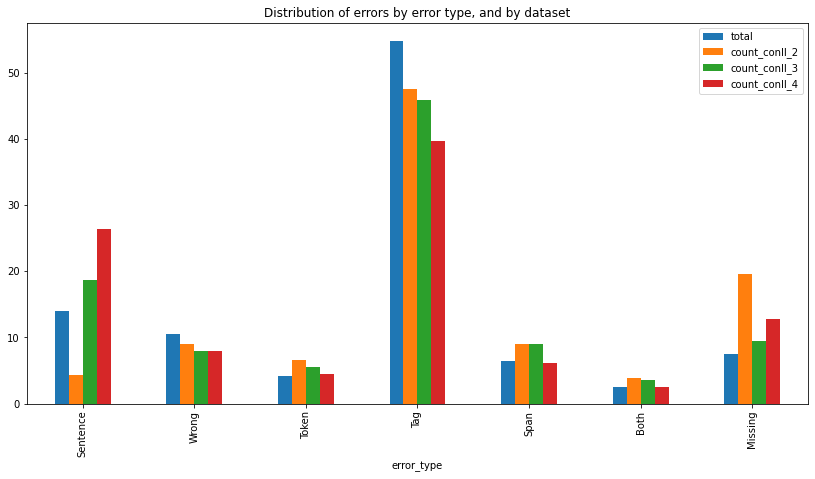

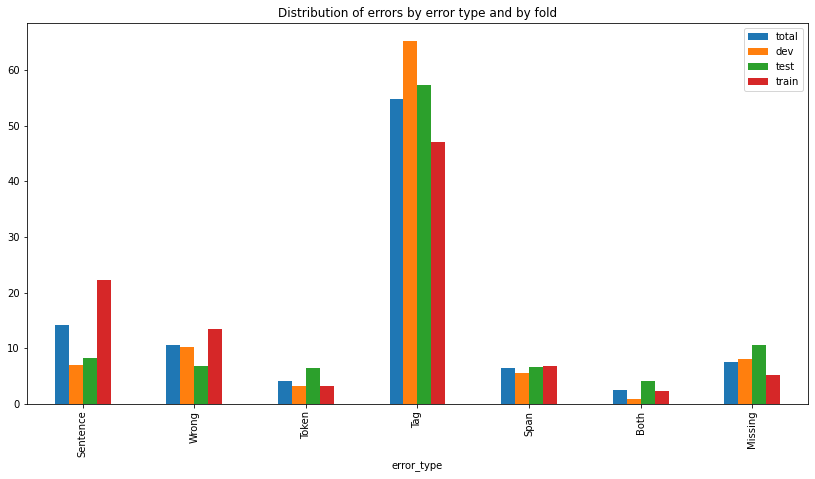

In [51]:
count_errs_by_type.plot("error_type", ['total',"count_conll_2", "count_conll_3", "count_conll_4"], legend=['a', 'b', 'c'], kind="bar", title="Distribution of errors by error type, and by dataset")
#count_errs_by_type.plot("error_type", "total",kind = "bar", title= "Distribution of errors by error type")
count_errs_by_type.plot("error_type", ["total","dev", "test", "train"], kind="bar", title="Distribution of errors by error type and by fold")


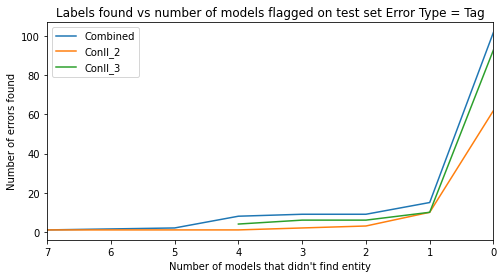

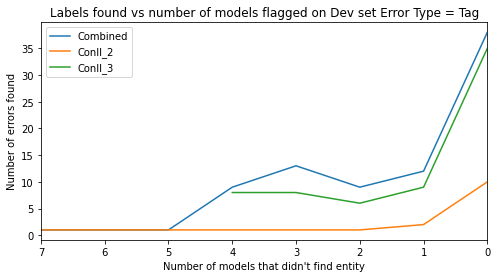

In [52]:
error_type_to_disp = "Tag" 

# a little helper function to improve readability
def get_fold(df,fold):
    return df[df["fold"] ==fold]

data_df = labels_by_error_type[error_type_to_disp] 
data_df_conll_2 = data_df[data_df["conll_2"] &(~data_df["num_models_missing"].isna())]
data_df_conll_3 = data_df[data_df["conll_3"] &(~data_df["num_models_missing"].isna())]

counts_total = make_counts(data_df)

counts_conll_2 = make_counts(data_df_conll_2)
counts_conll_3 = make_counts(data_df_conll_3)

#plot test set
plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.title("Labels found vs number of models flagged on test set Error Type = " +error_type_to_disp)
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Number of errors found")
plt.plot(get_fold(counts_total,"test")["num_models_missing"], get_fold(counts_total,"test")["total"], label="Combined")
plt.plot(get_fold(counts_conll_2,"test")["num_models_missing"], get_fold(counts_conll_2,"test")["total"], label="Conll_2")
plt.plot(get_fold(counts_conll_3,"test")["num_models_missing"], get_fold(counts_conll_3,"test")["total"], label="Conll_3")
plt.legend()


#plot dev set
plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.title("Labels found vs number of models flagged on Dev set Error Type = " +error_type_to_disp)
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Number of errors found")
plt.plot(get_fold(counts_total,"dev")["num_models_missing"], get_fold(counts_total,"dev")["total"], label="Combined")
plt.plot(get_fold(counts_conll_2,"dev")["num_models_missing"], get_fold(counts_conll_2,"dev")["total"], label="Conll_2")
plt.plot(get_fold(counts_conll_3,"dev")["num_models_missing"], get_fold(counts_conll_3,"dev")["total"], label="Conll_3")
plt.legend()

In [53]:
# show frequency distribution for given document
def count_error_distribution_for_doc(Doc_num, fold):
    counts = []
    for tag in Error_types: 
        df = labels_by_error_type[tag] #make a reference to the dataframe
        df = df[(df["doc_offset"] == Doc_num) & (df["fold"] == fold)]
        
        temp_dict = {}
        temp_dict["error_type"] = tag
        temp_dict["count"] = df.shape[0]
        temp_dict["count_conll_2"] = df[df["conll_2"]].shape[0]
        temp_dict["count_conll_3"] = df[df["conll_3"]].shape[0]
        temp_dict["count_conll_4"] = df[df["conll_4"]].shape[0]
        counts.append(temp_dict)
    return pd.DataFrame(counts) 

count_error_distribution_for_doc(35,"test")

,error_type,count,count_conll_2,count_conll_3,count_conll_4
0,Sentence,0,0,0,0
1,Wrong,0,0,0,0
2,Token,0,0,0,0
3,Tag,0,0,0,0
4,Span,0,0,0,0
5,Both,0,0,0,0
6,Missing,0,0,0,0


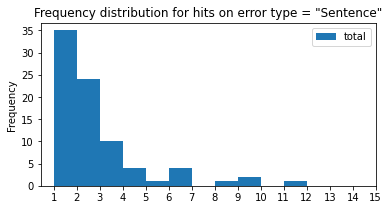

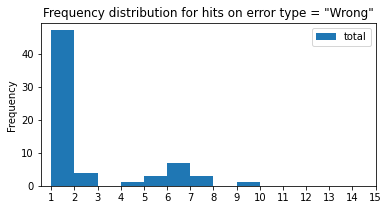

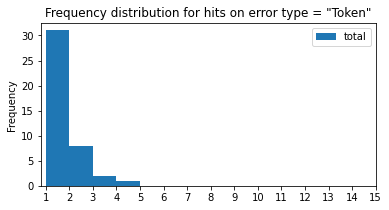

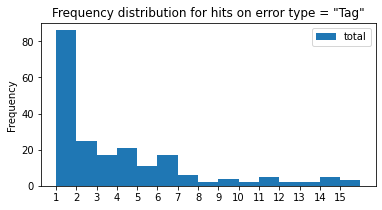

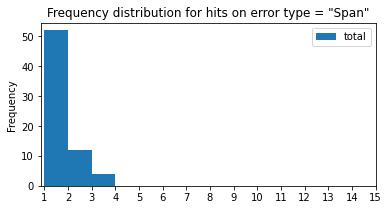

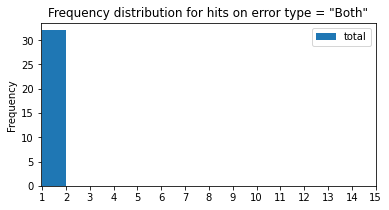

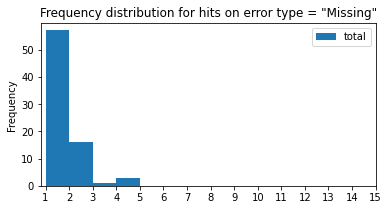

In [54]:
#find histogram of hits for dataset on given error type (may apply multiple times to get different looking data set)
def graph_hit_frequency_for_err_type(error_type):
    df = labels_by_error_type[error_type]
    counts =(df[["doc_offset", "fold"]]
            .groupby(["doc_offset","fold"])
            .aggregate({"doc_offset": "count"})
            .rename(columns={"doc_offset": "total"})
            .reset_index() )
    
    max_val = counts["total"].max()
    counts.drop("doc_offset", axis=1).plot.hist(xticks = range(1,16),bins = max_val-1, figsize = (6,3),
                title = "Frequency distribution for hits on error type = \"" + error_type + "\"")
    return counts; 

frequency_by_err_types = {}
for e_type in Error_types: 
    frequency_by_err_types[e_type] = graph_hit_frequency_for_err_type(e_type)

In [55]:
frequency_by_err_types["Token"]

,doc_offset,fold,total
0,3,test,1
1,15,dev,1
2,25,test,1
3,27,test,2
4,29,test,1
5,39,dev,1
6,39,test,1
7,40,test,2
8,54,test,1
9,56,test,2


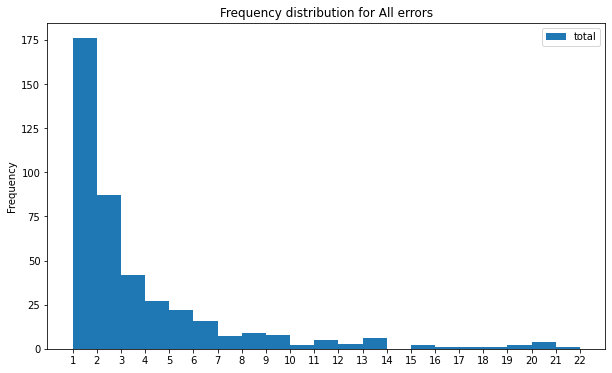

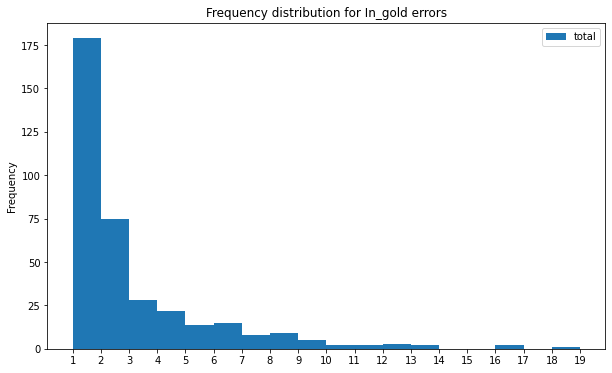

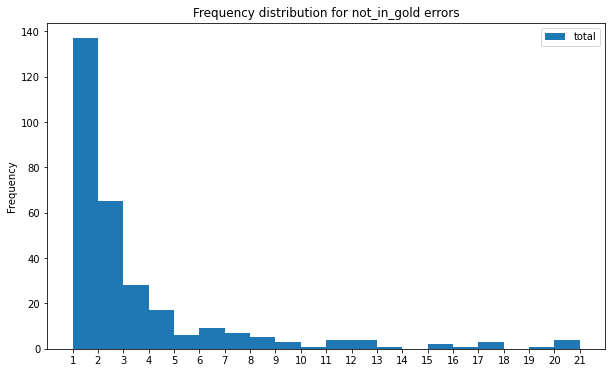

In [56]:
def make_doc_histogram(selection, selection_name):
    df = selection[selection["error_type"] != "None"]
    counts =(df[["doc_offset", "fold"]]
                .groupby(["doc_offset","fold"])
                .aggregate({"doc_offset": "count"})
                .rename(columns={"doc_offset": "total"})
                .reset_index() )
    max_val = counts["total"].max()
    counts.plot("doc_offset","total", kind="hist", xticks= range(1,max_val +1), figsize = (10,6), bins = max_val-1,
                title = "Frequency distribution for " +selection_name  )

make_doc_histogram(all_labels, "All errors")
make_doc_histogram(all_labels_in_gold, "In_gold errors")
make_doc_histogram(all_labels_not_in_gold, "not_in_gold errors")

In [57]:
##print out all_labels dataset as a csv 

ALL_LABELS_OUTPUT_FILE_NAME = os.path.join("..", "corrected_labels", "all_conll_corrections_combined.csv")

write_columns = ["fold", "doc_offset", "corpus_span", "corpus_ent_type", "error_type",
                 "correct_span", "correct_ent_type", "agreeing_models", "notes", "conll_2", "conll_3", "conll_4"]

write_file = all_labels[write_columns].copy()
write_file.loc[:, "hand_labelled"] = write_file["agreeing_models"].isna()
write_file = write_file[write_file.error_type != "None"]

write_file = write_file.rename(columns={"conll_2": "Original entrants ensemble", 
                                        "conll_3": "Custom models ensemble", 
                                        "conll_4": "Cross validation ensemble"})

# Drop "agreeing_models" and boolean columns to make diffs smaller.
write_file = write_file.drop(columns=["agreeing_models",
                                      "hand_labelled",
                                      "Original entrants ensemble",
                                      "Custom models ensemble",
                                      "Cross validation ensemble"])

# TODO: Sort so that order is consistent across Python versions.
#write_file = write_file.sort_values(["fold", "doc_offset", "corpus_span", "corpus_ent_type", "error_type"])

write_file.to_csv(ALL_LABELS_OUTPUT_FILE_NAME, index=False)
print(f"Wrote merged labels to {ALL_LABELS_OUTPUT_FILE_NAME}")

Wrote merged labels to ../corrected_labels/all_conll_corrections_combined.csv


In [58]:
write_file

,fold,doc_offset,corpus_span,corpus_ent_type,error_type,correct_span,correct_ent_type,notes
5,dev,2,"[122, 129): 'England'",LOC,Tag,"[122, 129): 'England'",ORG,Cricket team
6,dev,2,"[1354, 1362): 'Scotland'",LOC,Tag,"[1354, 1362): 'Scotland'",ORG,NaN
8,dev,2,"[235, 244): 'Australia'",LOC,Tag,"[235, 244): 'Australia'",ORG,Cricket team
10,dev,2,"[525, 533): 'Scotland'",LOC,Tag,"[525, 533): 'Scotland'",ORG,Cricket team
11,dev,2,"[61, 70): 'Australia'",LOC,Tag,"[61, 70): 'Australia'",ORG,Cricket team
...,...,...,...,...,...,...,...,...
4115,train,939,"[88, 93): 'Wales'",LOC,Tag,"[88, 93): 'Wales'",ORG,Soccer team
4116,train,939,"[99, 109): 'San Marino'",LOC,Tag,"[99, 109): 'San Marino'",ORG,Soccer team
4121,train,944,"[1036, 1042): 'Africa'",LOC,Sentence,"[1030, 1042): 'South Africa'",LOC,NaN
4122,train,944,"[1030, 1035): 'South'",LOC,Sentence,"[1030, 1042): 'South Africa'",NaN,"Sentence boundary between ""South"" and ""Africa"""


In [59]:
pd.options.display.max_rows = 60
all_labels[(all_labels["error_type"] == "Token") & (all_labels["fold"] == 'test')]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
1147,0,test,3,<NA>,NaN,Token,"[21, 37): 'SKIING-WORLD CUP'",MISC,"[28, 37): 'WORLD CUP'",MISC,NaN,both,False,0,17,True,both,True,False
1305,<NA>,test,25,<NA>,NaN,Token,"[24, 38): 'FOOTBALL-COLTS'",<NA>,"[33, 38): 'COLTS'",ORG,"Missing entity inside bad token ""FOOTBALL-COLTS""",in_gold,False,<NA>,<NA>,False,NaN,False,True
1379,0,test,27,<NA>,NaN,Token,"[565, 573): 'X-DENVER'",MISC,"[567, 573): 'DENVER'",ORG,NaN,in_gold,True,0,17,True,both,False,False
1384,0,test,27,<NA>,NaN,Token,"[889, 900): 'Y-GREEN BAY'",MISC,"[891, 900): 'GREEN BAY'",ORG,"split on '-', Y"" is an annotation""",in_gold,True,0,16,True,both,False,False
1401,0,test,29,<NA>,NaN,Token,"[25, 44): 'FOOTBALL-OHIO STATE'",MISC,"[34, 44): 'OHIO STATE'",ORG,NaN,both,True,0,17,True,both,False,False
1451,<NA>,test,39,<NA>,NaN,Token,"[1158, 1175): 'AbelardoFernandez'",PER,"[1158, 1175): 'Abelardo Fernandez'",PER,"Missing space between ""Abelardo"" and ""Fernandez"".",not_in_gold,False,<NA>,<NA>,False,NaN,False,True
1478,4,test,40,<NA>,NaN,Token,"[215, 236): 'Real Madrid-Barcelona'",MISC,"[215, 226): 'Real Madrid'",ORG,NaN,in_gold,False,4,13,False,NaN,True,False
1480,4,test,40,<NA>,NaN,Token,"[215, 236): 'Real Madrid-Barcelona'",MISC,"[227, 236): 'Barcelona'",ORG,NaN,in_gold,False,4,13,False,NaN,True,False
1573,0,test,54,<NA>,NaN,Token,"[11, 27): 'INTERVIEW-ZYWIEC'",MISC,"[21, 27): 'ZYWIEC'",ORG,NaN,in_gold,True,0,17,True,both,False,False
1604,2,test,56,<NA>,NaN,Token,"[11, 16): 'UK-US'",MISC,"[11, 13): 'UK'",LOC,NaN,in_gold,False,2,15,True,NaN,False,False
